<a href="https://colab.research.google.com/github/Vishruti31/Healthcare-dashboard/blob/main/Smartwatch_Data_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smartwatch Data Analysis using Python**

There is a lot of competition among the brands in the smartwatch industry. Smartwatches are preferred by people who like to take care of their fitness. Analyzing the data collected on your fitness is one of the use cases of Data Science in healthcare. So if you want to learn how to analyze smartwatch fitness data, this article is for you. In this article, I will take you through the task of Smartwatch Data Analysis using Python.

The dataset I am using for Smartwatch data analysis is publicly available on Kaggle. This dataset was initially collected from 30 female users of the Fitbit smartwatch.

Now I will start the task of Smartwatch Data Analysis by importing the necessary Python libraries and the dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

data = pd.read_csv("/content/Smart Watch Data.csv")
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

 let’s have a look at whether this dataset has any null values or not:

In [ ]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


So the dataset does not have any null values. Let’s have a look at the information about columns in the dataset:

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

The column containing the date of the record is an object. We may need to use dates in our analysis, so let’s convert this column into a datetime column:

In [ ]:
# Changing datatype of ActivityDate
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"],
                                      format="%m/%d/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Look at all the columns; you will see information about very active, fairly active, lightly active, and sedentary minutes in the dataset. Let’s combine all these columns as total minutes before moving forward:

In [ ]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

159    1440
565     823
908      48
383     938
691     930
Name: TotalMinutes, dtype: int64


Now let’s have a look at the descriptive statistics of the dataset:

In [ ]:
print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

# **Let’s Analyze the Smartwatch Data⌚️**

The dataset has a “Calories” column; it contains the data about the number of calories burned in a day. Let’s have a look at the relationship between calories burned and the total steps walked in a day:

In [ ]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes",
                    trendline="ols",
                    title="Relationship between Calories & Total Steps")
figure.show()

You can see that there is a linear relationship between the total number of steps and the number of calories burned in a day. Now let’s look at the average total number of active minutes in a day:

In [ ]:
label = ["Very Active Minutes", "Fairly Active Minutes",
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes",
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

**Observations:**

    81.3% of Total inactive minutes in a day
    15.8% of Lightly active minutes in a day
    On an average, only 21 minutes (1.74%) were very active
    and 1.11% (13 minutes) of fairly active minutes in a day
We transformed the data type of the ActivityDate column to the datetime column above. Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”:

In [ ]:
data["Day"] = data["ActivityDate"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


Now let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
# Now let’s have a look at the number of inactive minutes on each day of the week:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

So Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset. Now let’s have a look at the number of calories burned on each day of the week:

In [ ]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.

So this is how you can analyze smartwatch data using the Python programming language. There is a lot more you can do with this dataset. You can also use it for predicting the number of calories burned in a day.

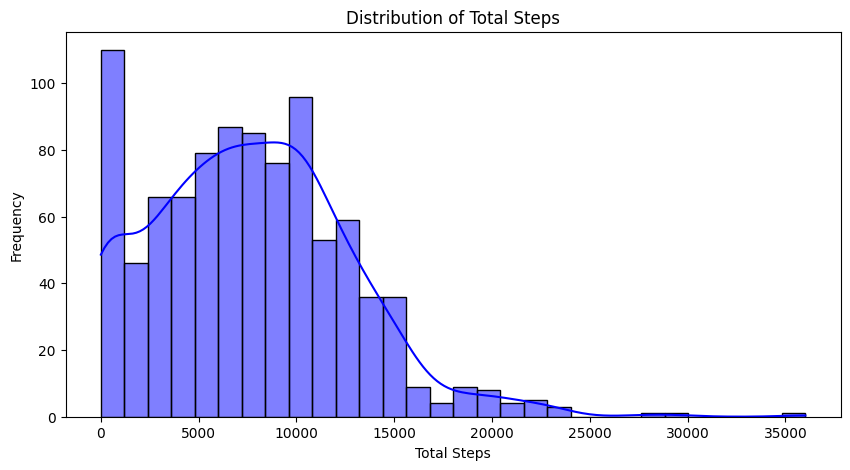

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data["TotalSteps"], bins=30, kde=True, color="blue")
plt.title("Distribution of Total Steps")
plt.xlabel("Total Steps")
plt.ylabel("Frequency")
plt.show()

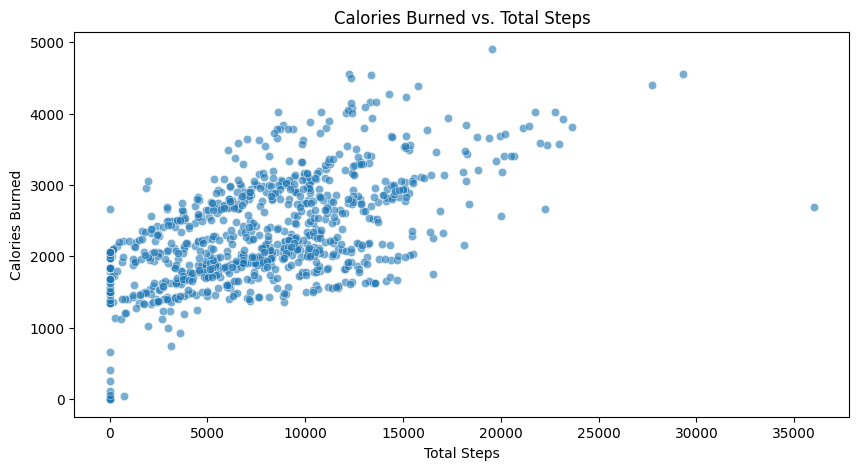

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data["TotalSteps"], y=data["Calories"], alpha=0.6)
plt.title("Calories Burned vs. Total Steps")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.show()

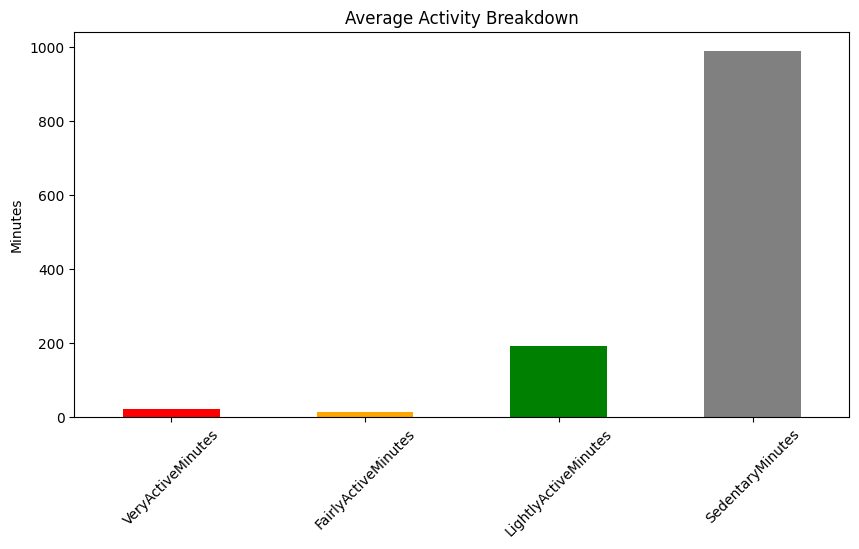

In [31]:
activity_types = ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]
data[activity_types].mean().plot(kind="bar", figsize=(10, 5), color=["red", "orange", "green", "gray"])
plt.title("Average Activity Breakdown")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

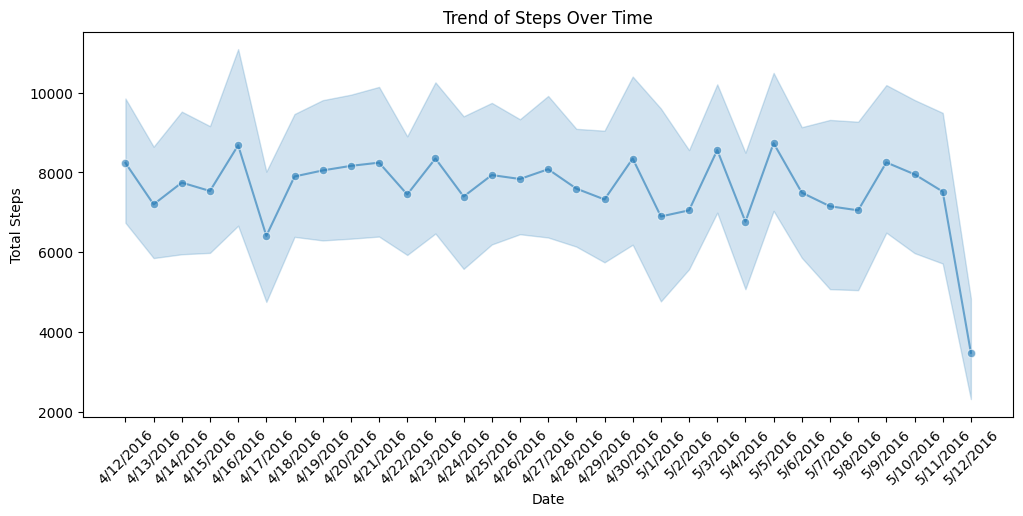

In [32]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=data["ActivityDate"], y=data["TotalSteps"], marker="o", alpha=0.6)
plt.title("Trend of Steps Over Time")
plt.xlabel("Date")
plt.ylabel("Total Steps")
plt.xticks(rotation=45)
plt.show()

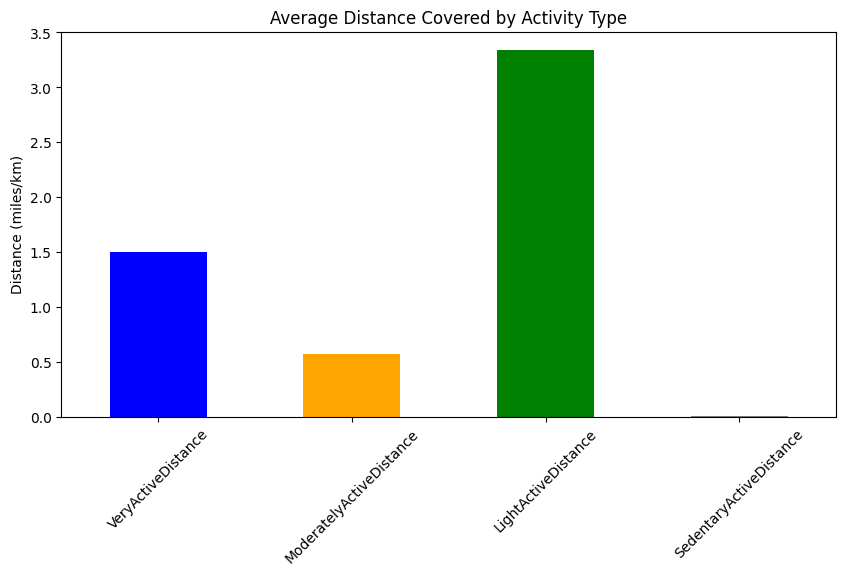

In [33]:
distance_types = ["VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance"]
data[distance_types].mean().plot(kind="bar", figsize=(10, 5), color=["blue", "orange", "green", "gray"])
plt.title("Average Distance Covered by Activity Type")
plt.ylabel("Distance (miles/km)")
plt.xticks(rotation=45)
plt.show()

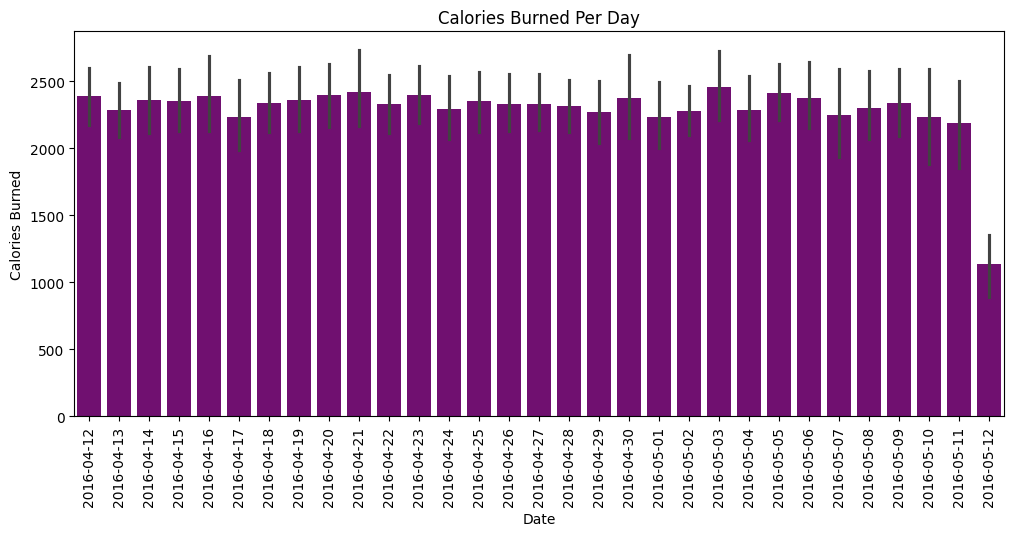

In [36]:


# Plot Calories Burned Per Day
plt.figure(figsize=(12, 5))
sns.barplot(x=data["ActivityDate"].dt.strftime('%Y-%m-%d'), y=data["Calories"], color="purple")
plt.title("Calories Burned Per Day")
plt.xlabel("Date")
plt.ylabel("Calories Burned")
plt.xticks(rotation=90)
plt.show()


# **Summary**

So this is how you can analyze the data collected by a smartwatch about fitness using Python. Smartwatches are preferred by people who like to take care of their fitness. Analyzing the data collected on your fitness is one of the use cases of Data Science in healthcare. I hope you liked this article on Smartwatch data analysis using Python. Feel free to ask valuable questions in the comments section below.